DAY 6

In [5]:
 #replave nan with median if we have outliers
#replace nan with mean when we have continous range of values and we dont have outliers
#if we have repeated data then we can replace with mode and if the data is categorical
#interpolate helps us to find pattern and then replace nana with some meningfull value
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.DataFrame()

In [16]:
col = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country' , 'income' ]
df=pd.read_csv("E:/Data Science/DataSets/adult.data",names=col)
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df['age'].skew()
#this shows us that data is skewed towards right that time median is to be used

0.5587433694130484

<Axes: xlabel='age', ylabel='Count'>

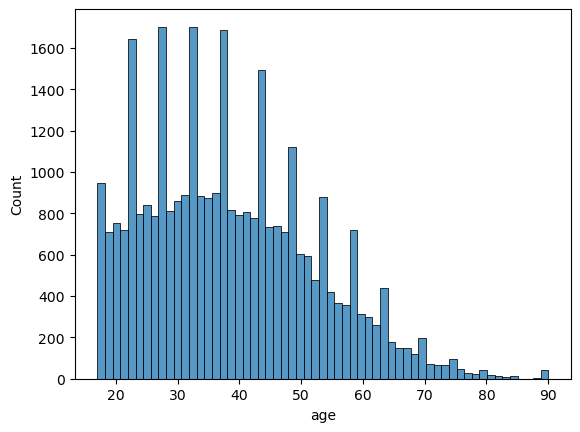

In [ ]:
sns.histplot(df['age'])


In [20]:
df.age.kurt()
#shows us that tail is thin so its better to replace with mean

-0.16612745957143904

In [21]:
df3=df.copy()

In [22]:
# updating some of the age to nan
df3.loc[(df3['age'] >= 30) & (df3['age'] <= 40), 'age'] = np.nan

In [27]:
df3.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [25]:
mean=df3.age.mean()

In [26]:
df3['age']=df3.age.fillna(mean)

In [31]:
df4=df.copy()
df4.loc[(df4['age'] >= 30) & (df4['age'] <= 40), 'age'] = np.nan

In [41]:
df4.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [37]:
df4=df4.ffill()

In [40]:
df4=df4.bfill()

In [44]:
df4.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,50.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
df5=df.copy()

In [46]:
from scipy import linalg


df4=df4.interpolate(method='linear')

C:\Users\abhya\AppData\Local\Temp\ipykernel_10016\337065257.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df4=df4.interpolate(method='linear')


In [49]:
df6=df.copy()
df6.loc[(df6['age'] >= 30) & (df6['age'] <= 40), 'age'] = np.nan

In [52]:
df6.isna().sum()

age               1
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [51]:
df6=df6.interpolate(method='linear')

C:\Users\abhya\AppData\Local\Temp\ipykernel_10016\808040486.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df6=df6.interpolate(method='linear')


In [54]:
df.duplicated().sum()

24

In [56]:
df7=df.copy()

In [57]:
df7.drop_duplicates(inplace=True)

In [58]:
df8=df.copy()

In [59]:
df.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [60]:
df8[df8.duplicated(keep = "first")]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


<Axes: >

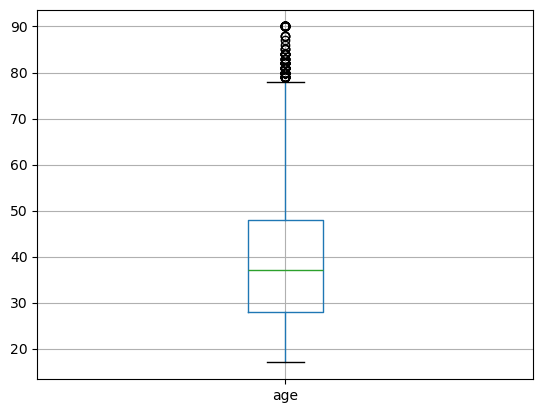

In [61]:
df.boxplot('age')

#lower line of he box is lower quartile Q1 and upper line of he box is upper quartile Q3
#the line above and below is the whisker
#the above dots are called outliers


In [62]:
"""
Q1: 25%
Q3: 75%

IQR = Q3 - Q1

Lower bound = Q1 - 1.5*IQR
upper bound = Q3 + 1.5*IQR

"""

'\nQ1: 25%\nQ3: 75%\n\nIQR = Q3 - Q1\n\nLower bound = Q1 - 1.5*IQR\nupper bound = Q3 + 1.5*IQR\n\n'

In [66]:
q1=df.age.quantile(.25)
q3=df.age.quantile(.75)
print(q1,q3)

28.0 48.0


In [67]:
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
print(iqr,lower_bound,upper_bound)

20.0 -2.0 78.0


In [69]:
outliers = df['age'][(df['age']<lower_bound) | (df['age'] > upper_bound)]
outliers.count()

143

In [71]:
df9=df.copy()
df9=df[(df['age']>=lower_bound) & (df['age']<=upper_bound)]

In [74]:
print(df.age.count(),df9.age.count())

32561 32418


In [75]:
median=df.age.median
df10=df.copy()

In [80]:
median_value = df.age.median()
df9 = df.copy()
df9['age'] = df9['age'].where(((df9['age']<lower_bound) | (df9['age'] > upper_bound)), median_value)

In [81]:
df11=df.copy()

In [84]:
df11['z_score']=(df['age']-df['age'].mean())/df.age.std()

In [87]:
Z_outliers=df11[(df11.z_score <3) | (df11.z_score >3)]

In [89]:
Z_outliers.age.count()

32561

In [90]:
#if data is normally distributed the we can use Z score if skeued then we can use iqr

<Axes: xlabel='sex', ylabel='age'>

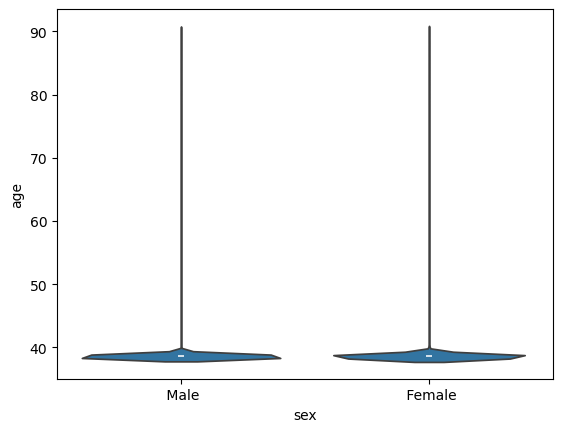

In [97]:
sns.violinplot(x='sex',y='age',data=df11)

In [94]:
mean_val=df11.age.mean()
df11.age=df11.age.where(df11.z_score.abs()>3,mean_val)

In [95]:
df11.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
z_score           32561
dtype: int64

In [101]:
df12=df.copy()
lower_limit=df['age'].quantile(0.05)
upper_limit=df['age'].quantile(0.75)

In [102]:
df12.age=df12.age.clip(lower=lower_limit,upper=upper_limit)

In [104]:
df12.age.count()

32561